# BankChurners

### *predicting bankchurners with credit-card customer attrition*


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


In [2]:
df = pd.read_csv("../../dataset/BankChurners/BankChurners.csv")
# Columns (5,6) have mixed types

In [3]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [4]:
pd.Series(df["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"],dtype="float64")

0        0.000093
1        0.000057
2        0.000021
3        0.000134
4        0.000022
           ...   
10122    0.000191
10123    0.995270
10124    0.997880
10125    0.996710
10126    0.996620
Name: Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1, Length: 10127, dtype: float64

In [5]:
df["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"].dtypes

dtype('float64')

In [6]:
pd.Series(df["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"],dtype="float64")

0        0.000093
1        0.000057
2        0.000021
3        0.000134
4        0.000022
           ...   
10122    0.000191
10123    0.995270
10124    0.997880
10125    0.996710
10126    0.996620
Name: Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1, Length: 10127, dtype: float64

In [7]:
df["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"].describe()

count    10127.000000
mean         0.159997
std          0.365301
min          0.000008
25%          0.000099
50%          0.000181
75%          0.000337
max          0.999580
Name: Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1, dtype: float64

In [8]:
# je ne m'intéresse pas aux 2 dernières colonnes
bankchurners = df.iloc[:,:-2]

In [9]:
bankchurners.shape

(10127, 21)

In [10]:
# changement de nom
bankchurners = bankchurners.rename(columns={"CLIENTNUM": "ClientNum"});bankchurners

,ClientNum,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [11]:
bankchurners.columns

Index(['ClientNum', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

### Types de variables:


| N°  | Variables       | Définition      | Types   |  Quantitative?    |  Qualitative?|
| :------------- | :------------- |:-------------| :-----|:-------------| :-------------|
| 1 | **ClientNum**     | Identifiant unique du client | `Integer` | *Continue*| -
| 2 | **Attrition_Flag**      | Indicateur indiquant si le client s'est retiré ou non      |   `Boolean` |  *Discrete*| -
| 3 | **Customer_Age** | Age du client      |    `Integer` | *Discrete*| - 
| 4 | **Gender** | Genre du client      |    `String` | - | *nominal*| 
| 5 | **Dependent_count** | Nombre de personnes à charge que le client a      |  `Integer` | *Discrete*| - 
| 6 | **Education_Level** | Niveau d'étude du client      | `String` | - | *ordinale* |
| 7 | **Marital_Status** | Statut Marital du client   | `String` | - | *nominal* | 
| 8 | **Income_Category** | Catégorie de salaire du client    | `String` | - | *ordinale* | 
| 9 | **Card_Category** | type de carte détenu par le client      | `String` | - | *nominal* | 
| 10 | **Months_on_book** | Durée d'enregistrement du client dans les registres | `Integer` | *Discrete*| - 
| 11 | **Total_Relationship_Count** | Nombre total de relations  ou d'échange entre le client et le fournisseur de carte de crédit      |    `Integer` | *Continue*| - 
| 12 | **Months_Inactive_12_mon** | Nombre de mois sur les douze derniers mois d'innactivités du client      |    `Integer` | *Discrete* | - 
| 13 | **Contacts_Count_12_mon** | Nombres de contacts par la banque le client a eu durant les 12 derniers mois |    `Integer` | *Continue* | - 
| 13 | **Credit_Limit** | Limite de crédit du client      |    `Float` | *Continue* | - 
| 14 | **Total_Revolving_Bal** | Total du solde renouvelable du client  | `Integer` | *Discrete*| - 
| 15 | **Avg_Open_To_Buy** | taux moyen d'ouverture à l'achat du client, indique le ratio entre les publicités reçu par le client et ceux qu'ils consultent | `Float` | *Continue*| - 
| 16 | **Total_Amt_Chng_Q4_Q1** | Montant total modifié du trimestre 4 au trimestre 1 |    `Integer` | *Continue* | - 
| 17 | **Total_Trans_Amt** | Montant total de la transaction |  `Integer` | *Continue* | - 
| 18 | **Total_Trans_Ct** | Nombre total de transactions |  `Integer` | *Continue* | - 
| 19 | **Total_Ct_Chng_Q4_Q1** | Le décompte total a changé du trimestre 4 au trimestre 1      |  `Float` | *Continue*| - 
| 20 | **Avg_Utilization_Ratio** | Taux d'utilisation moyen du client   |  `Float` | *Continue*| - 



In [12]:
#je renomme les variables
bankchurners.rename(columns = {
                     'Gender':'Genre',
                     'Attrition_Flag':'Indicatif_Depart',
                     'Marital_Status':'Statut_Marital',
                     'Income_Category':'Categorie_Salarial',
                     'Card_Category':'Categorie_Carte',
                     'Months_on_book':'Dure_Enregistrement_Registre',
                     'Total_Relationship_Count':'Relations',
                     'Dependent_count':'Dependants',
                     'Customer_Age':'Age', 
                     'Education_Level':'Niveau_Etudes',
                     'Months_Inactive_12_mon':'Mois_Inactif_sur_12',
                     'Contacts_Count_12_mon':'Nombre_contacts_sur_12',
                     'Total_Revolving_Bal':'Total_Solde_Renouvelable',
                     'Avg_Open_To_Buy':'Taux_Moyen_ouverture',
                     'Total_Amt_Chng_Q4_Q1':'Montant_Modifie_S4_S1',
                     'Total_Trans_Amt':'Montant_Total_transaction',
                     'Total_Trans_Ct':'Nombre_Total_transaction',
                     'Total_Ct_Chng_Q4_Q1':'Decompte_Total_S4_S1',
                     'Avg_Utilization_Ratio':'Taux_Uti_Moyen'},inplace = True)

In [13]:
bankchurners.describe()

,ClientNum,Age,Dependants,Dure_Enregistrement_Registre,Relations,Mois_Inactif_sur_12,Nombre_contacts_sur_12,Credit_Limit,Total_Solde_Renouvelable,Taux_Moyen_ouverture,Montant_Modifie_S4_S1,Montant_Total_transaction,Nombre_Total_transaction,Decompte_Total_S4_S1,Taux_Uti_Moyen
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [14]:
bankchurners.head(10)

,ClientNum,Indicatif_Depart,Age,Genre,Dependants,Niveau_Etudes,Statut_Marital,Categorie_Salarial,Categorie_Carte,Dure_Enregistrement_Registre,...,Mois_Inactif_sur_12,Nombre_contacts_sur_12,Credit_Limit,Total_Solde_Renouvelable,Taux_Moyen_ouverture,Montant_Modifie_S4_S1,Montant_Total_transaction,Nombre_Total_transaction,Decompte_Total_S4_S1,Taux_Uti_Moyen
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


#### Exploration

Explorons les donné de la dataframe bankchurners plus en détails

In [15]:
bankchurners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ClientNum                     10127 non-null  int64  
 1   Indicatif_Depart              10127 non-null  object 
 2   Age                           10127 non-null  int64  
 3   Genre                         10127 non-null  object 
 4   Dependants                    10127 non-null  int64  
 5   Niveau_Etudes                 10127 non-null  object 
 6   Statut_Marital                10127 non-null  object 
 7   Categorie_Salarial            10127 non-null  object 
 8   Categorie_Carte               10127 non-null  object 
 9   Dure_Enregistrement_Registre  10127 non-null  int64  
 10  Relations                     10127 non-null  int64  
 11  Mois_Inactif_sur_12           10127 non-null  int64  
 12  Nombre_contacts_sur_12        10127 non-null  int64  
 13  C

In [16]:
# comptabilisons les valeurs manquantes
print(bankchurners.isnull().sum())

ClientNum                       0
Indicatif_Depart                0
Age                             0
Genre                           0
Dependants                      0
Niveau_Etudes                   0
Statut_Marital                  0
Categorie_Salarial              0
Categorie_Carte                 0
Dure_Enregistrement_Registre    0
Relations                       0
Mois_Inactif_sur_12             0
Nombre_contacts_sur_12          0
Credit_Limit                    0
Total_Solde_Renouvelable        0
Taux_Moyen_ouverture            0
Montant_Modifie_S4_S1           0
Montant_Total_transaction       0
Nombre_Total_transaction        0
Decompte_Total_S4_S1            0
Taux_Uti_Moyen                  0
dtype: int64


In [17]:
#vérifions la présence des doublons
bankchurners.loc[bankchurners['ClientNum'].duplicated(keep=False),:]

,ClientNum,Indicatif_Depart,Age,Genre,Dependants,Niveau_Etudes,Statut_Marital,Categorie_Salarial,Categorie_Carte,Dure_Enregistrement_Registre,...,Mois_Inactif_sur_12,Nombre_contacts_sur_12,Credit_Limit,Total_Solde_Renouvelable,Taux_Moyen_ouverture,Montant_Modifie_S4_S1,Montant_Total_transaction,Nombre_Total_transaction,Decompte_Total_S4_S1,Taux_Uti_Moyen


In [19]:
bankchurners.Age.isna().sum()

0

In [20]:
bankchurners.Genre.value_counts()

F    5358
M    4769
Name: Genre, dtype: int64

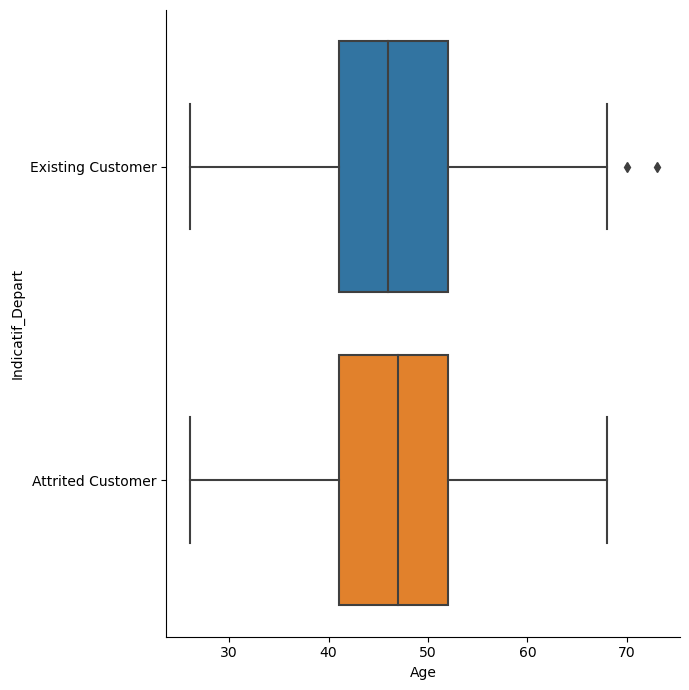

In [21]:
sns.catplot(x="Age", y="Indicatif_Depart", data = bankchurners, kind= "box", height=7)

#### horizontal bar plot 

Créons un boxplot horizontal qui nous permet de comparer les clients de chaque classe de la variable 'Indicatif_Depart' qui comprends d'un côté les clients existants et de l'autre les clients mécontents c'est à dire ceux qui ont quitté la banque.
En X on a une liste de des deux varibles représentants les deux classes
En y on a une liste des nombres clients dans chaque classe

[Text(0, 0, '8500'), Text(0, 0, '1627')]

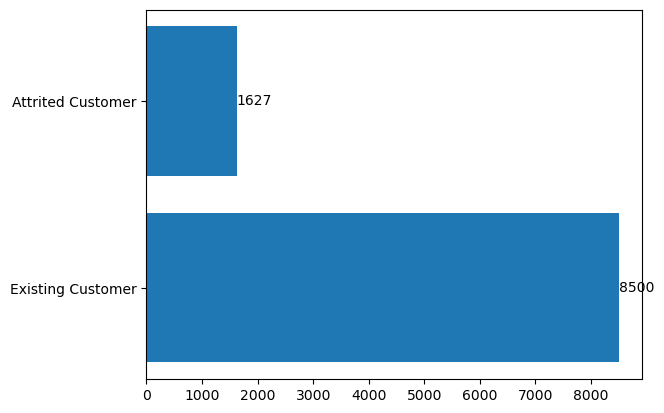

In [24]:
x = ['Existing Customer','Attrited Customer']
y = [bankchurners['Indicatif_Depart'].value_counts()[0],bankchurners['Indicatif_Depart'].value_counts()[1]]
fig, ax = plt.subplots()
bars = ax.barh(x, y)
ax.bar_label(bars)

In [30]:
# dataframe contenant uniquement les clients mécontents
churners_df = bankchurners[bankchurners['Indicatif_Depart'] == 'Attrited Customer']
churners_df

,ClientNum,Indicatif_Depart,Age,Genre,Dependants,Niveau_Etudes,Statut_Marital,Categorie_Salarial,Categorie_Carte,Dure_Enregistrement_Registre,...,Mois_Inactif_sur_12,Nombre_contacts_sur_12,Credit_Limit,Total_Solde_Renouvelable,Taux_Moyen_ouverture,Montant_Modifie_S4_S1,Montant_Total_transaction,Nombre_Total_transaction,Decompte_Total_S4_S1,Taux_Uti_Moyen
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,...,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,...,3,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,...,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,716893683,Attrited Customer,55,F,3,Uneducated,Single,Unknown,Blue,47,...,3,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


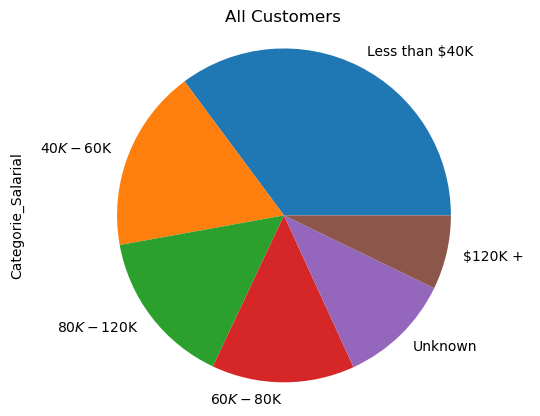

In [25]:
# Diagramme en secteurs
bankchurners["Categorie_Salarial"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal')
plt.title('All Customers')
plt.show() # Affiche le graphique

#### Niveau d'Etudes

In [27]:
bankchurners['Niveau_Etudes'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

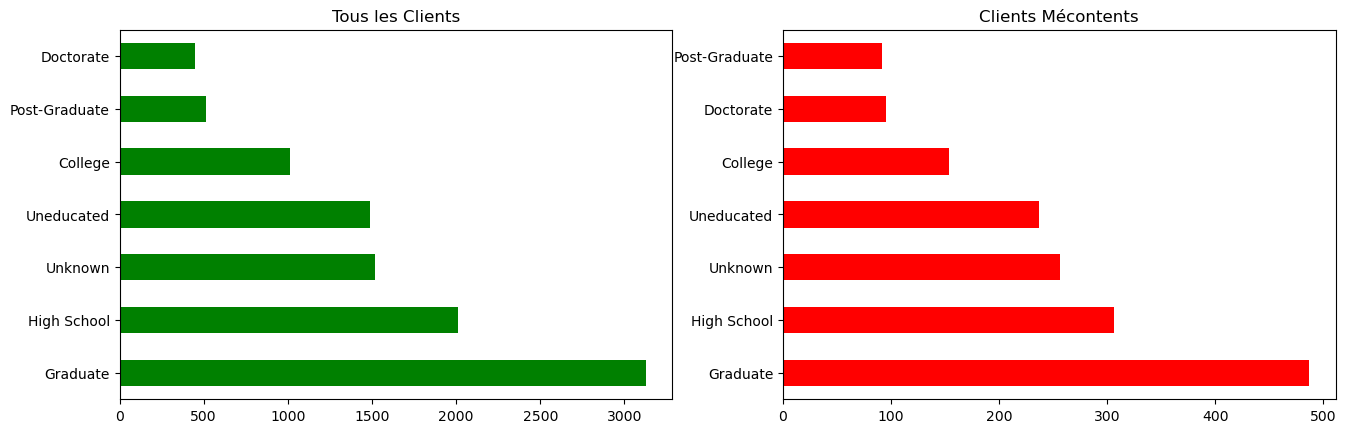

In [33]:
plt.subplot(1,2,1)
bankchurners['Niveau_Etudes'].value_counts().plot(kind = 'barh', color = 'green', title='Tous les Clients')

plt.subplot(1,2,2)
churners_df['Niveau_Etudes'].value_counts().plot(kind = 'barh', color = 'red', title='Clients Mécontents')

plt.subplots_adjust(left = 0.5, right= 2.4)